In [230]:
import parse_data.prepare_data as prepare_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import globals
import plotting.plot_trajectory as plot_trajectory
import plotting.plot_octagon as plot_octagon
import data_extraction.extract_trial as extract_trial
import math
import trajectory_analysis.trajectory_vectors as trajectory_vectors
import trajectory_analysis.trajectory_direction as trajectory_direction
import data_extraction.get_indices as get_indices

In [231]:
### INFERRED LOSER'S CHOICE ###
# Identify loser in a trial
# extract loser's trajectory
# restrict to second half of trajectory
# calculate cosine similarities between direction and wall vectors for trajectory
# run checks to see if the most aligned wall to head direction can be confidently considered the choice

In [232]:
# paths
# data_folder = '/home/tom/Documents/SWC/data' # desktop Duan Lab
data_folder = r'D:\Users\Tom\OneDrive\PhD\SWC\data' # desktop home
# data_folder = r'C:\Users\tomha\OneDrive\PhD\SWC\data' # octagon laptop
# json_filename = '240913_Yansu_Jerry/2024-09-13_11-53-34_YansuSecondSolo.json' 
# json_filename = '240913_Yansu_Jerry/2024-09-13_11-31-00_YansuJerrySocial.json'
# json_filenames = [r'first_experiments_2409\240913\2024-09-13_11-23-37_YansuFirstSolo.json']
# json_filenames = [r'first_experiments_2409\240913\2024-09-13_11-31-00_YansuJerrySocial.json']
json_filenames = [r'fourth_experiments_2410\241017\2024-10-17_16-41-38_ZimoElsaSocial.json']

In [233]:
df, trials_list = prepare_data.prepare_data(data_folder, json_filenames)

Loading complete.
Preprocessing complete.


In [234]:
trial_num = 19

In [235]:
trial = trials_list[trial_num]
player_id = (get_indices.get_trigger_activators(trials_list)[trial_num] -1) * -1

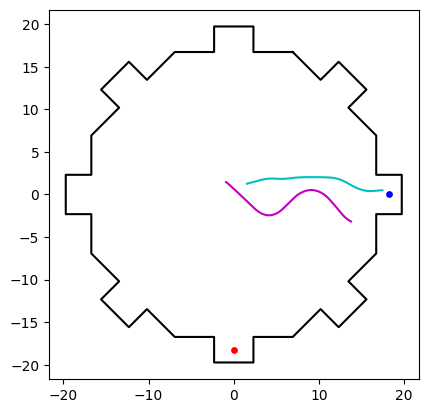

In [236]:
# plot both trajectories from a single trial
ax = plot_octagon.plot_octagon()
plot_trajectory.plot_trial_trajectory(ax, trial=trial)

# plot Red and Blue dots to identify the High and Low walls respectively
walls = get_indices.get_walls(trial)
wall1_index = walls[0] - 1
wall2_index = walls[1] - 1
alcove_coordinates = plot_octagon.return_alcove_centre_points()
plt.scatter(alcove_coordinates[0,wall1_index], alcove_coordinates[1,wall1_index], c='r', s=15)
plt.scatter(alcove_coordinates[0,wall2_index], alcove_coordinates[1,wall2_index], c='b', s=15)

<Axes: >

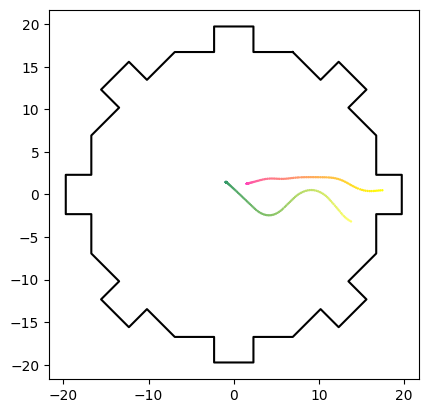

In [237]:
ax = plot_octagon.plot_octagon()
plot_trajectory.plot_trial_trajectory_colour_map(ax, trial=trial)

In [238]:
trajectory = trajectory_vectors.extract_trial_player_trajectory(trial=trial, player_id=player_id)

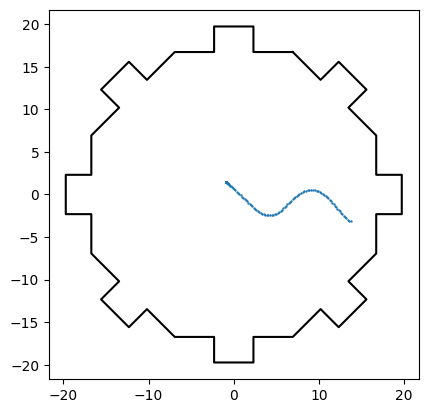

In [239]:
# plot only a single trajectory from this trial
ax = plot_octagon.plot_octagon()
ax.scatter(trajectory[0,:], trajectory[1,:], s=0.5)

In [240]:
direction_vectors_smoothed = trajectory_direction.get_smoothed_player_direction_vectors_for_trajectory(trajectory,
                                                                                                       window_size=10)

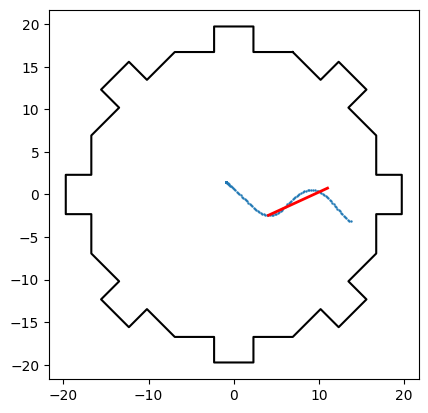

In [241]:
# example plotting of direction vector
start_index=60
x_start = trajectory[0,start_index]
y_start = trajectory[1,start_index]
x_gradient = direction_vectors_smoothed[0,start_index]
y_gradient = direction_vectors_smoothed[1,start_index]
vector_length = 40

start = [x_start, y_start]
end = [x_start + x_gradient*vector_length, y_start + y_gradient*vector_length]

direction_vector_coordinates = np.array(list(zip(start,end)))

ax = plot_octagon.plot_octagon()
ax.scatter(trajectory[0,:], trajectory[1,:], s=0.5)
ax.plot(direction_vector_coordinates[0,:], direction_vector_coordinates[1,:], c='r', linewidth=2)

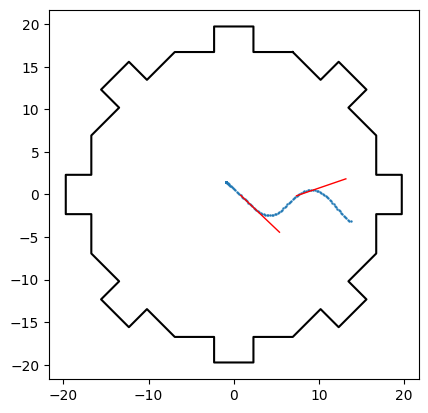

In [242]:
## Find the average direction vector at equally-spaced points throughout the trajectory 
ax = plot_octagon.plot_octagon()
ax.scatter(trajectory[0,:], trajectory[1,:], s=0.5)

for time_index in range(0, direction_vectors_smoothed.shape[1], 40):
    x_start = trajectory[0,time_index]
    y_start = trajectory[1,time_index]
    x_gradient = direction_vectors_smoothed[0,time_index]
    y_gradient = direction_vectors_smoothed[1,time_index]
    vector_length = 30
    
    start = [x_start, y_start]
    end = [x_start + x_gradient*vector_length, y_start + y_gradient*vector_length]
    
    this_direction_vector_coordinates = np.array(list(zip(start,end)))
    ax.plot(this_direction_vector_coordinates[0,:], this_direction_vector_coordinates[1,:], c='r', linewidth=1)

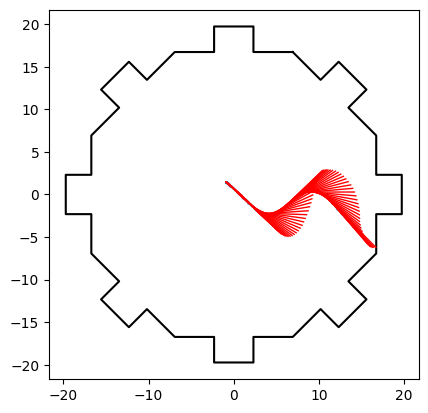

In [243]:
## Find the average direction vector at all points throughout the trajectory 
ax = plot_octagon.plot_octagon()
ax.scatter(trajectory[0,:], trajectory[1,:], s=0.5)

for time_index in range(0, direction_vectors_smoothed.shape[1]):
    x_start = trajectory[0,time_index]
    y_start = trajectory[1,time_index]
    x_gradient = direction_vectors_smoothed[0,time_index]
    y_gradient = direction_vectors_smoothed[1,time_index]
    vector_length = 30
    
    start = [x_start, y_start]
    end = [x_start + x_gradient*vector_length, y_start + y_gradient*vector_length]
    
    this_direction_vector_coordinates = np.array(list(zip(start,end)))
    ax.plot(this_direction_vector_coordinates[0,:], this_direction_vector_coordinates[1,:], c='r', linewidth=1)



In [244]:
trial = trials_list[trial_num]
trajectory = trajectory_vectors.extract_trial_player_trajectory(trial=trial, player_id=0)

In [245]:
cosine_similarity_trajectory, thetas = trajectory_direction.cosine_similarity_throughout_trajectory(trajectory,
                                                                                            window_size=10,
                                                                                            num_walls=8,
                                                                                            calculate_thetas=True)

d:\tom\documents\swc\repos\octagon_analysis\trajectory_analysis\trajectory_vectors.py:193: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * direction_vector_norm)


In [277]:
length_trajectory = cosine_similarity_trajectory.shape[1]
two_thirds_length = int(np.floor((2/3)*length_trajectory))
# cosine_similarity_trajectory[:,two_thirds_length:length_trajectory]

In [247]:
thetas.shape, cosine_similarity_trajectory.shape

((8, 107), (8, 107))

In [248]:
thetas = np.rad2deg(thetas)

In [276]:
# thetas[:,two_thirds_length:length_trajectory]

In [250]:
# the closer to 1 the value, the more aligned the trajectory with the wall at that index
np.mean(cosine_similarity_trajectory[:,10:67], axis=1)

array([nan, nan, nan, nan, nan, nan, nan, nan])

In [251]:
### Inferring loser's choice ### 

In [252]:
# find the loser IDs for each trial 
winner_ids = get_indices.get_trigger_activators(trials_list)
loser_ids = (winner_ids -1) * -1

In [253]:
# single-trial functions to:
#     - extract trajectory
#     - clip trajectory to second half
#     - identify average most aligned wall in this second half
#     - check proportion timepoints that agree with average most aligned wall
#     - check difference between average most aligned and average second most aligned


In [254]:
a = 4
b = 2*a/3
4 * (2/3)

2.6666666666666665

In [255]:
b

2.6666666666666665

In [256]:
def extract_final_third_trajectory(trajectory):
    
    trajectory_length = trajectory.shape[1]
    half_length = int(np.floor(trajectory_length*(2/3)).item())

    half_trajectory = trajectory[:,half_length:trajectory_length]

    return half_trajectory
    
    

In [257]:
def average_most_aligned_wall_trajectory(cosine_similarity_trajectory):
    ''' Return index of the most aligned (on average) wall to the trajectory '''
     
    return np.argmax(np.mean(cosine_similarity_trajectory, axis=1))
    
    

In [258]:
def proportion_trajectory_aligned_with_average(cosine_similarity_trajectory, most_aligned_wall):
    ''' Return the proportion of timepoints in which the most aligned wall is the same as the average '''
    count_aligned = 0
    for i in range(cosine_similarity_trajectory.shape[1]):
        cosine_similarity_this_timepoint = cosine_similarity_trajectory[:,i]
        most_aligned_wall_this_timepoint = np.argmax(cosine_similarity_this_timepoint)
        if most_aligned_wall_this_timepoint == most_aligned_wall:
            count_aligned += 1

    proportion_timepoints_aligned = count_aligned/cosine_similarity_trajectory.shape[1]

    return proportion_timepoints_aligned
        

In [259]:
def difference_to_second_highest_alignment(cosine_similarity_trajectory):
    ''' Return the difference between the average most aligned wall and average
        second most aligned wall ''' 

    # average cosine similarities across timepoints
    average_cosine_similarities = np.mean(cosine_similarity_trajectory, axis=1)

    # find the most aligned wall and the alignment value
    most_aligned_wall_alignment = np.max(average_cosine_similarities)

    # repeat for the second highest alignment
    average_cosine_similarities_remove_max = average_cosine_similarities[average_cosine_similarities != most_aligned_wall_alignment]
    second_most_aligned_wall_alignment = np.max(average_cosine_similarities_remove_max)

    # return the difference
    return most_aligned_wall_alignment - second_most_aligned_wall_alignment



In [260]:
difference_to_second_highest_alignment

<function __main__.difference_to_second_highest_alignment(cosine_similarity_trajectory)>

In [261]:
# call all the functions
trial_num = trial_num
losers_choice_accepted = False
trial = trials_list[trial_num]
loser_id = loser_ids[trial_num]
trajectory = trajectory_vectors.extract_trial_player_trajectory(trial=trial, player_id=loser_id)
end_of_trajectory = extract_final_third_trajectory(trajectory)
cosine_similarity_trajectory = trajectory_direction.cosine_similarity_throughout_trajectory(end_of_trajectory,
                                                                                            window_size=10,
                                                                                            num_walls=8,
                                                                                            calculate_thetas=False)

average_most_aligned_wall_index = average_most_aligned_wall_trajectory(cosine_similarity_trajectory)
highest_alignment_val = np.max(np.mean(cosine_similarity_trajectory, axis=1))
average_most_aligned_wall = average_most_aligned_wall_index + 1
proportion_timepoints_aligned = proportion_trajectory_aligned_with_average(cosine_similarity_trajectory, average_most_aligned_wall_index)
difference_to_second_highest_alignment_val = difference_to_second_highest_alignment(cosine_similarity_trajectory)


# ## Now I can set arbitrary cutoffs for loser's choice confidence (based on this trial, maybe 65% aligned, difference of >0.2?
# ## Will need to do some checks on these
# ## then just loop over every trial and run this code. Save loser's choice wall number in one array and whether we accept this value
# ## in another array
# ## Closeness to a wall is a strong tell of choice not explicitly included, but it is implicitly included the difference between angles
# ## as you approach one wall
# if proportion_timepoints_aligned > 0.5 and difference_to_second_highest_alignment_val > 0.06 and highest_alignment_val > 0.9:
#     losers_choice_accepted = True
#     print(average_most_aligned_wall, losers_choice_accepted)
    
if highest_alignment_val > 0.875:
    losers_choice_accepted = True
    print(average_most_aligned_wall, losers_choice_accepted)

In [262]:
end_of_trajectory.shape, trajectory.shape

((2, 40), (2, 118))

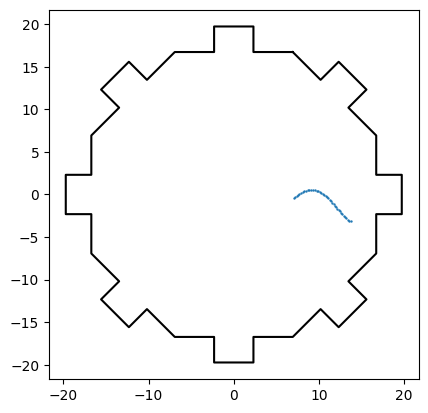

In [263]:
# plot only a single trajectory from this trial
ax = plot_octagon.plot_octagon()
ax.scatter(end_of_trajectory[0,:], end_of_trajectory[1,:], s=0.5)

In [264]:
np.max(np.mean(cosine_similarity_trajectory, axis=1))

np.float64(0.8501970756094155)

In [265]:
np.mean(cosine_similarity_trajectory, axis=1)

array([-0.39631535,  0.29424687,  0.81371346,  0.85019708,  0.38048525,
       -0.31256442, -0.82129883, -0.85529326])

In [266]:
proportion_timepoints_aligned

0.6206896551724138

In [267]:
difference_to_second_highest_alignment_val

np.float64(0.036483616186267276)

In [268]:
average_most_aligned_wall

np.int64(4)

In [269]:
np.argmax(np.mean(cosine_similarity_trajectory, axis=1))

np.int64(3)

In [270]:
# umbrella function to extract loser's choice for one trial
def infer_loser_choice_trial(trial_list, trial_index, loser_ids):
    ''' Given a trial list and index, and array of loser id vals, find the most
        aligned wall for the loser in the second half of their trajectory, and decide
        whether this most aligned wall should be considered their choice '''
    
    # LVs 
    losers_choice_accepted = False
    
    # get trial and loser id
    trial = trials_list[trial_index]
    loser_id = loser_ids[trial_index]

    # get trajectory for loser
    trajectory = trajectory_vectors.extract_trial_player_trajectory(trial=trial, player_id=loser_id)
    
    # ignore first half of trajectory
    trajectory_end = extract_final_third_trajectory(trajectory)
    
    # fine cosine similarities between trajectory direction vector and player-alcove vectors for each wall
    cosine_similarity_trajectory = trajectory_direction.cosine_similarity_throughout_trajectory(trajectory_end,
                                                                                            window_size=10,
                                                                                            num_walls=8,
                                                                                            calculate_thetas=False)
    # find the most aligned wall (mean average)
    average_most_aligned_wall_index = average_most_aligned_wall_trajectory(cosine_similarity_trajectory)
    average_most_aligned_wall_num = average_most_aligned_wall_index + 1
    highest_alignment_val = np.max(np.mean(cosine_similarity_trajectory, axis=1))


    # confidence checks
    # find the fraction of timepoints in which the most aligned wall was the same as the average for the trajectory
    proportion_timepoints_aligned = proportion_trajectory_aligned_with_average(cosine_similarity_trajectory, average_most_aligned_wall_index)
    # difference in average cosine similarity between the most and next most aligned wall
    difference_to_second_highest_alignment_val = difference_to_second_highest_alignment(cosine_similarity_trajectory)

    # # decide whether to accept the loser's choice
    # if proportion_timepoints_aligned > 0.60 and difference_to_second_highest_alignment_val > 0.08:
    #     losers_choice_accepted = True

    # decide whether to accept the loser's choice
    if highest_alignment_val > 0.875:
        losers_choice_accepted = True

    return average_most_aligned_wall_num, losers_choice_accepted

    
    

In [271]:
# umbrella function to extract loser's choice for all trials in a list
def infer_loser_choice_session(trial_list):
    ''' Given a trial list find the most aligned wall for the loser 
        in the second half of their trajectory, and decide
        whether this most aligned wall should be considered their choice,
        for all trials 
        Return an array of most aligned walls and a boolean array of confidence '''

    # initialise
    loser_inferred_choice = np.zeros(len(trial_list))
    loser_inferred_choice_confidence = np.zeros(len(trial_list), dtype=np.bool)
    
    # find the loser IDs for each trial 
    winner_ids = get_indices.get_trigger_activators(trials_list)
    loser_ids = (winner_ids -1) * -1

    # loop through trials
    for trial_index in range(len(trial_list)):
        this_loser_inferred_choice, this_loser_inferred_choice_confidence = infer_loser_choice_trial(trial_list, trial_index, loser_ids)
        loser_inferred_choice[trial_index] = this_loser_inferred_choice
        loser_inferred_choice_confidence[trial_index] = this_loser_inferred_choice_confidence


    return loser_inferred_choice, loser_inferred_choice_confidence
        

    
    

In [272]:
loser_inferred_choice, loser_inferred_choice_confidence = infer_loser_choice_session(trials_list)

In [273]:
loser_inferred_choice

array([1., 1., 3., 6., 8., 2., 7., 3., 6., 5., 1., 6., 1., 4., 8., 2., 7.,
       7., 4., 4., 2., 8., 3., 8., 2., 5., 1., 4., 7., 6., 4., 1., 7., 2.,
       5., 3., 5., 1., 3., 5., 4., 1., 8., 2., 8., 1., 4., 6., 8., 4., 4.,
       1., 7., 5., 7., 8., 2., 5., 1., 8., 5., 2., 7., 1., 8., 4., 1., 7.,
       8., 3., 3., 1., 1., 1., 2., 2., 2., 1., 4., 2., 5., 1., 3., 7., 4.,
       2., 4., 6., 6., 3., 7., 7., 7., 1., 4., 6., 5., 3., 1., 4., 1., 6.,
       4., 4., 4., 8., 2., 5., 8., 5., 1., 6., 1., 8., 5., 6., 1., 8., 1.,
       8., 3., 6., 1., 5., 5., 2., 1., 2., 5., 3., 7., 7., 1., 8., 1., 8.,
       8., 8., 8., 8., 7., 1., 1., 5., 2., 2., 7., 5., 1., 5., 8., 2., 7.,
       8., 6., 1., 4., 8., 8., 2., 1., 1., 3., 7., 2., 1., 6., 6., 1., 7.,
       1., 4., 2., 5., 6., 1.])

In [274]:
np.sum(loser_inferred_choice_confidence.astype(int))/np.size(loser_inferred_choice_confidence)

np.float64(0.6704545454545454)

In [275]:
loser_inferred_choice_confidence

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True, False, False,  True, False, False,
        True, False,  True,  True, False, False,  True,  True, False,
        True, False, False,  True, False,  True,  True, False,  True,
        True, False,  True,  True, False, False, False, False,  True,
       False,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True, False, False,  True,  True,
       False,  True,  True, False,  True,  True,  True, False, False,
        True, False,  True,  True,  True,  True, False, False,  True,
        True, False, False, False,  True, False,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,